<a href="https://colab.research.google.com/github/RITIK1442840127/Play-Store-Data-Analysis/blob/main/Play_Store_Analysis_by_RITIK_TIWARI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>


In [89]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams
# figure size in inches

%matplotlib inline

In [90]:
#importing dataset
working_directory = '/content/drive/MyDrive/Dataset/'
df = pd.read_csv('/content/Play Store Data.csv')
df1=pd.read_csv('/content/User Reviews.csv')

In [91]:
type(df)

pandas.core.frame.DataFrame

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [93]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [94]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [95]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [96]:
df.shape

(10841, 13)

We can combine tables to make it easier to see data. For this, we are gonna use "concat function" that is found Pandas library.

pd.concat([data frame parameters], axis,ignore_index) : It combines 2 tables.
axis : It adds the tables as horizontal or vertical. If axis equals 0, it adds as horizontal. If axis equals 1, it adds as vertical.
ignore_index : It ignores index values.

In [97]:
data1 = df.head()
data2 = df.tail()
concat_data = pd.concat([data1,data2],axis=0,ignore_index=True)
concat_data

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
5,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
6,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
7,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
8,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
9,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [98]:
df.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


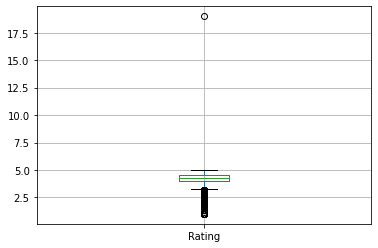

In [99]:
df.boxplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb900970850>]],
      dtype=object)

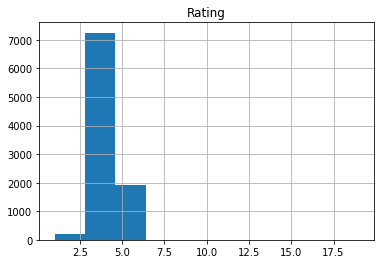

In [100]:
df.hist()

## Data Cleaning of Playstore Dataset


Dataset can contain missing data, numerical string value, various cues. If we can clean them, we can make easy our analysis

In [101]:
df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

'1.9' is wrong value. So I have to see in which rows '1.9' corresponds to.

In [102]:
df[df['Category'] == '1.9']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


We can make NaN category value. At that time we can get a clean data. I used shift() method that is found Pandas library.


In [103]:
df.loc[10472] = df.loc[10472].shift()
df['App'].loc[10472] = df['Category'].loc[10472]
df['Category'].loc[10472] = np.nan
df.loc[10472]

App               Life Made WI-Fi Touchscreen Photo Frame
Category                                              NaN
Rating                                                1.9
Reviews                                                19
Size                                                 3.0M
Installs                                           1,000+
Type                                                 Free
Price                                                   0
Content Rating                                   Everyone
Genres                                                NaN
Last Updated                            February 11, 2018
Current Ver                                        1.0.19
Android Ver                                    4.0 and up
Name: 10472, dtype: object

In [104]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4.0, nan, 4.8,
       4.9, 3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5.0, 2.6, 3.0, 1.9, 2.5, 2.8,
       2.7, 1.0, 2.9, 2.3, 2.2, 1.7, 2.0, 1.8, 2.4, 1.6, 2.1, 1.4, 1.5,
       1.2, '1.9'], dtype=object)

Data type of Rating is object. If we convert from string to numeric, we can make easy.

In [105]:
df['Rating'] = pd.to_numeric(df['Rating'], errors='coerce')
df['Rating'].dtype


dtype('float64')

**Review**


In [106]:
df['Reviews'].unique()

array(['159', '967', '87510', ..., '603', '1195', '398307'], dtype=object)

In [107]:
df[df['Reviews'] =='3.0M']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [108]:
df['Reviews'] = df.Reviews.replace("0.0",0)
df['Reviews'] = df.Reviews.replace("3.0M",3000000.0)
df['Reviews'] = df['Reviews'].astype(float)
df['Reviews'].dtype


dtype('float64')

**SIZE**

In [109]:
df['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

Data type of Size is object. I had to convert the column because it contains the application sizes. Firstly I changed 'Varies with device' value with Nan. After, I dropped 'M' and 'k'. I changed from '1000+' to 1000. Finally, I converted float value.



In [110]:
df['Size'] = df.Size.replace("Varies with device",np.nan)
df['Size'] = df.Size.str.replace("M","000") # All size values became the kilobyte type.
df['Size'] = df.Size.str.replace("k","")
df['Size'] = df.Size.replace("1,000+",1000)
df['Size'] =df['Size'].astype(float)
df['Size'].dtype

dtype('float64')

**Installs**

In [111]:
df['Installs'].unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [112]:
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace('+','') if '+' in str(x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str (x) else str(x))
df['Installs'] = df['Installs'].apply(lambda x: float(x))
df['Installs'].dtype

dtype('float64')

**Price**

In [113]:
df['Price'].unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

Data type of Price is object. I have made similar processes, which I made the in 'Size'.

In [114]:
df['Price'] = df.Price.replace("Everyone",np.nan)
df['Price'] = df.Price.str.replace("$","").astype(float)
df['Price'].dtype

dtype('float64')

**Last Updated**

In [115]:
df['Last Updated'].unique()

array(['January 7, 2018', 'January 15, 2018', 'August 1, 2018', ...,
       'January 20, 2014', 'February 16, 2014', 'March 23, 2014'],
      dtype=object)

Data type of Last Uptated is object. I converted from string to date type.

In [116]:
df['Last Updated'] = pd.to_datetime(df['Last Updated'])
df['Last Updated']

0       2018-01-07
1       2018-01-15
2       2018-08-01
3       2018-06-08
4       2018-06-20
           ...    
10836   2017-07-25
10837   2018-07-06
10838   2017-01-20
10839   2015-01-19
10840   2018-07-25
Name: Last Updated, Length: 10841, dtype: datetime64[ns]

In [117]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9007ce610>,
      dtype=object)

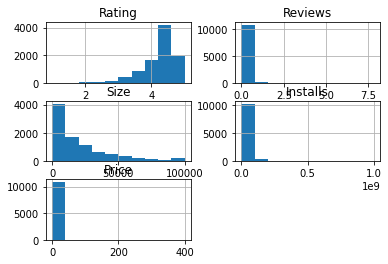

In [118]:
df.hist()

In [119]:
df.isnull().sum()

App                  0
Category             1
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               1
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [120]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [121]:
df['Size']=df['Size'].fillna(df['Size'].median())

In [122]:
df.isnull().sum()

App               0
Category          1
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            1
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [123]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())
print(df['Category'].mode())
print(df['Genres'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    FAMILY
dtype: object
0    Tools
dtype: object


In [124]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)
df['Category'].fillna(df['Category'].mode()[0],inplace=True)
df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)


In [125]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [126]:
# we want price, reviews and installs columns as numericel feature not as categoricel feature so, below transformation is applied to convert it in numerical feature. 
df['Price']=df['Price'].apply(lambda x: str(x).replace('$',' ') if '$' in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Reviews']=pd.to_numeric(df['Reviews'],errors='ignore')

In [127]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+',' ') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [128]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [129]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.206263,4.441119e+05,18548.915976,1.546291e+07,1.027273
std,0.480830,2.927629e+06,22210.970422,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [130]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb90bc45550>,
      dtype=object)

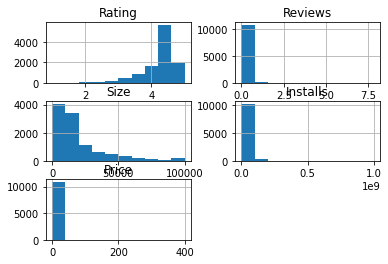

In [131]:
df.hist()

In [132]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [133]:
df['Rating']=df['Rating'].fillna(df['Rating'].median())

In [134]:
df['Size']=df['Size'].fillna(df['Size'].median())

In [135]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [136]:
print(df['Type'].mode())
print(df['Current Ver'].mode())
print(df['Android Ver'].mode())
print(df['Category'].mode())
print(df['Genres'].mode())

0    Free
dtype: object
0    Varies with device
dtype: object
0    4.1 and up
dtype: object
0    FAMILY
dtype: object
0    Tools
dtype: object


In [137]:
df['Type'].fillna(df['Type'].mode()[0],inplace=True)
df['Current Ver'].fillna(df['Current Ver'].mode()[0],inplace=True)
df['Android Ver'].fillna(df['Android Ver'].mode()[0],inplace=True)
df['Category'].fillna(df['Category'].mode()[0],inplace=True)
df['Genres'].fillna(df['Genres'].mode()[0],inplace=True)


In [138]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [139]:
# we want price, reviews and installs columns as numericel feature not as categoricel feature so, below transformation is applied to convert it in numerical feature. 
df['Price']=df['Price'].apply(lambda x: str(x).replace('$',' ') if '$' in str(x) else str(x))
df['Price']=df['Price'].apply(lambda x: float(x))
df['Reviews']=pd.to_numeric(df['Reviews'],errors='ignore')

In [140]:
df['Installs']=df['Installs'].apply(lambda x: str(x).replace('+',' ') if '+' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(',','') if ',' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: str(x).replace(' ','') if ' ' in str(x) else str(x))
df['Installs']=df['Installs'].apply(lambda x: float(x))

In [141]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000.0,10000.0,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7,5000000.0,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000.0,50000000.0,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [142]:
df.describe()

,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.206263,4.441119e+05,18548.915976,1.546291e+07,1.027273
std,0.480830,2.927629e+06,22210.970422,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


## Data Cleaning of User dataset

In [143]:
df1.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [144]:
df1.shape

(64295, 5)

In [145]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [146]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb9007c2750>,
      dtype=object)

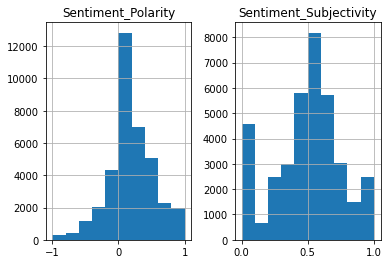

In [147]:
df1.hist()

In [148]:
df1_new=df1.copy()

In [149]:
df1_new.drop_duplicates(keep=False,inplace=True)

In [150]:
df1_new['Sentiment_Polarity'].fillna(df1_new['Sentiment_Polarity'].mean(),inplace=True)
df1_new['Sentiment_Subjectivity'].fillna(df1_new['Sentiment_Subjectivity'].mean(),inplace=True)
df1_new['Sentiment'].fillna(df1_new['Sentiment'].mode()[0],inplace=True)
df1_new['Translated_Review'].fillna(df1_new['Translated_Review'].mode()[0],inplace=True)

In [151]:
df1_new.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [152]:
df1_new.tail()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
64222,Housing-Real Estate & Property,Most ads older many agents ..not much owner po...,Positive,0.173333,0.486667
64223,Housing-Real Estate & Property,"If photos posted portal load, fit purpose. I'm...",Positive,0.225000,0.447222
64226,Housing-Real Estate & Property,"Dumb app, I wanted post property rent give opt...",Negative,-0.287500,0.250000
64227,Housing-Real Estate & Property,I property business got link SMS happy perform...,Positive,0.800000,1.000000
64230,Housing-Real Estate & Property,"Useless app, I searched flats kondapur, Hydera...",Negative,-0.316667,0.400000


##Exploratory Data Analysis

#Content Rating and average rating

In [153]:
group_content_rating=df.groupby('Content Rating')
x=group_content_rating['Rating'].agg(np.mean)

print(x)

Content Rating
Adults only 18+    4.300000
Everyone           4.202983
Everyone 10+       4.258937
Mature 17+         4.136874
Teen               4.240315
Unrated            4.200000
Name: Rating, dtype: float64


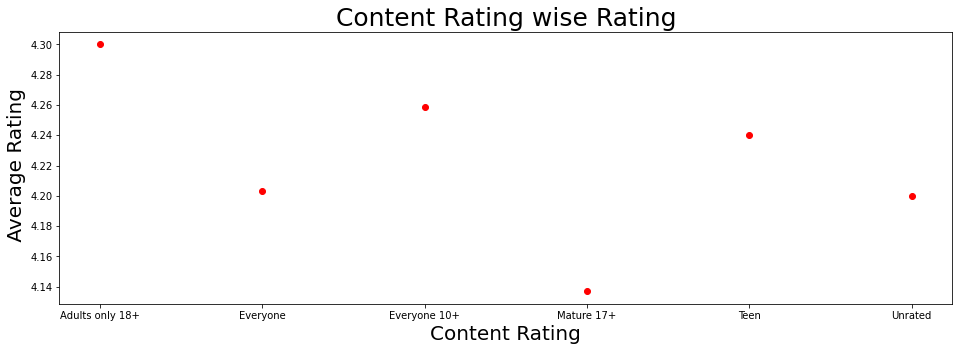

In [154]:
plt.figure(figsize=(16,5))
plt.plot(x,'ro')
plt.title('Content Rating wise Rating',fontsize=25)
plt.xlabel('Content Rating',fontsize=20)
plt.ylabel(' Average Rating',fontsize=20)
plt.show()

**INFERENCE**   
Adults only 18+ content`s have highest average rating followed by Everyone 10+ content.

## Top ten most reviewed apps

In [155]:
top_10_apps_by_reviews=df.sort_values(by=['Reviews'], ascending=False)
top_10_apps_by_reviews.head(10)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2544,Facebook,SOCIAL,4.1,78158306.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
3943,Facebook,SOCIAL,4.1,78128208.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-08-03,Varies with device,Varies with device
381,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
336,WhatsApp Messenger,COMMUNICATION,4.4,69119316.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
3904,WhatsApp Messenger,COMMUNICATION,4.4,69109672.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-03,Varies with device,Varies with device
2604,Instagram,SOCIAL,4.5,66577446.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2611,Instagram,SOCIAL,4.5,66577313.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
2545,Instagram,SOCIAL,4.5,66577313.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
3909,Instagram,SOCIAL,4.5,66509917.0,13000.0,1.000000e+09,Free,0.0,Teen,Social,2018-07-31,Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578.0,13000.0,1.000000e+09,Free,0.0,Everyone,Communication,2018-08-01,Varies with device,Varies with device


**INFERENCE**    
Facebook have hightest number of review in Play store followed by Whats App messenger & Instagram.

## App vs. count of translated reviews

In [156]:
df1.groupby('App').count().sort_values(by=['Translated_Review'],ascending=False).head(10)

,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
App,,,,
Bowmasters,312,312,312,312
Angry Birds Classic,273,273,273,273
Helix Jump,273,273,273,273
Calorie Counter - MyFitnessPal,254,255,255,255
Duolingo: Learn Languages Free,240,240,240,240
Candy Crush Saga,240,240,240,240
Garena Free Fire,222,222,222,222
8 Ball Pool,219,219,219,219
Calorie Counter - Macros,200,200,200,200


**INFERENCE**    
Bowmasters have most translated review in Playstore followed by Angry Birds Classic & Helix Jump.

 ## What kind of geners are most successful

In [157]:
df['Genres'].describe()

count     10841
unique      119
top       Tools
freq        843
Name: Genres, dtype: object

In [158]:
print( len(df['Category'].unique()) , "categories")

33 categories


Text(0.5, 1.0, 'count of app in each category')

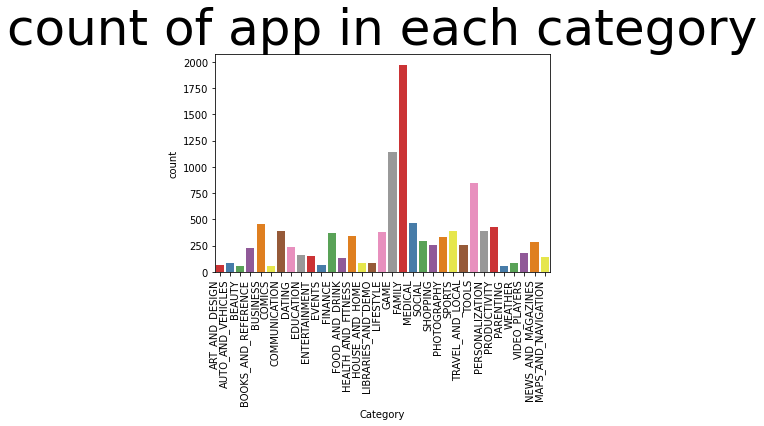

In [159]:

g = sns.countplot(x="Category",data=df, palette = "Set1")
g.set_xticklabels(g.get_xticklabels() , rotation=90, ha="right")
g
plt.title('count of app in each category', size=50)

In [160]:
df.Genres.unique()

array(['Art & Design', 'Art & Design;Pretend Play',
       'Art & Design;Creativity', 'Art & Design;Action & Adventure',
       'Auto & Vehicles', 'Beauty', 'Books & Reference', 'Business',
       'Comics', 'Comics;Creativity', 'Communication', 'Dating',
       'Education;Education', 'Education', 'Education;Creativity',
       'Education;Music & Video', 'Education;Action & Adventure',
       'Education;Pretend Play', 'Education;Brain Games', 'Entertainment',
       'Entertainment;Music & Video', 'Entertainment;Brain Games',
       'Entertainment;Creativity', 'Events', 'Finance', 'Food & Drink',
       'Health & Fitness', 'House & Home', 'Libraries & Demo',
       'Lifestyle', 'Lifestyle;Pretend Play',
       'Adventure;Action & Adventure', 'Arcade', 'Casual', 'Card',
       'Casual;Pretend Play', 'Action', 'Strategy', 'Puzzle', 'Sports',
       'Music', 'Word', 'Racing', 'Casual;Creativity',
       'Casual;Action & Adventure', 'Simulation', 'Adventure', 'Board',
       'Trivia', 'Role 

**INFERENCE**    
Family kind of apps are most successful in playstore followed by Game & Tools.

## Sentiment_Polarity of review

In [161]:
df1.columns
        

Index(['App', 'Translated_Review', 'Sentiment', 'Sentiment_Polarity',
       'Sentiment_Subjectivity'],
      dtype='object')

In [162]:
print(df.columns)
df.describe()

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


,Rating,Reviews,Size,Installs,Price
count,10841.000000,1.084100e+04,10841.000000,1.084100e+04,10841.000000
mean,4.206263,4.441119e+05,18548.915976,1.546291e+07,1.027273
std,0.480830,2.927629e+06,22210.970422,8.502557e+07,15.948971
min,1.000000,0.000000e+00,1.000000,0.000000e+00,0.000000
25%,4.100000,3.800000e+01,6.800000,1.000000e+03,0.000000
50%,4.300000,2.094000e+03,13000.000000,1.000000e+05,0.000000
75%,4.500000,5.476800e+04,26000.000000,5.000000e+06,0.000000
max,5.000000,7.815831e+07,100000.000000,1.000000e+09,400.000000


In [163]:
df1 = df1['Sentiment'].value_counts()
df1 = df1.reset_index()
def bar_plot(x,y,y_label,title,color):
    objects = x.values
    y_pos = np.arange(len(objects))
    plt.figure(figsize=(10,5))
    bar = plt.bar(x,y,color=color)
    plt.xticks(y_pos, objects)
    plt.ylabel(y_label)
    plt.title(title)
    
    return bar

In [164]:
df1['index'].values

array(['Positive', 'Negative', 'Neutral'], dtype=object)

<BarContainer object of 3 artists>

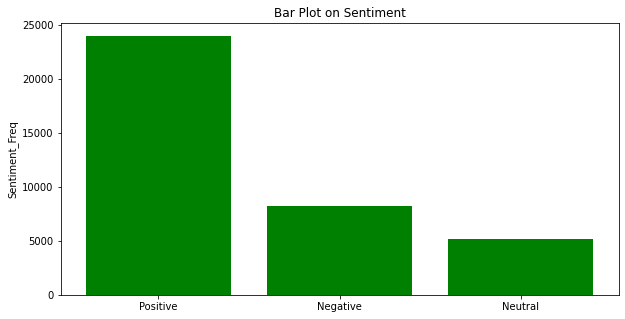

In [165]:
bar_plot(x = df1['index'],y = df1['Sentiment'],color='g',y_label = 'Sentiment_Freq',title = 'Bar Plot on Sentiment')


In [166]:
df1.head(2)

,index,Sentiment
0,Positive,23998
1,Negative,8271


**INFERENCE**     
Most of People`s Sentiment is Positive in Play store.

**Extract Categorical Features**

In [167]:
cat_features=[col for col in df.columns if df[col].dtype=='O']
cat_features

['App',
 'Category',
 'Type',
 'Content Rating',
 'Genres',
 'Current Ver',
 'Android Ver']

In [168]:
categorical=df[cat_features]


**Number of Free & Paid apps**

In [169]:
categorical['Type'].value_counts()

Free    10041
Paid      800
Name: Type, dtype: int64

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

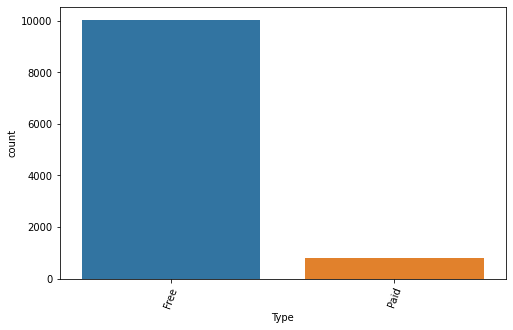

In [170]:
plt.rcParams['figure.figsize'] = (8,5)
sns.countplot(x='Type',data=df)
plt.xticks(rotation=70)

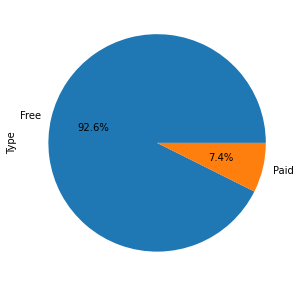

In [171]:
df["Type"].value_counts().plot.pie(autopct = "%1.1f%%")

**INFERENCE**   
Number of Free apps is more then number of Paid apps.

**Type vs Rating Analysis**

<Figure size 1080x576 with 0 Axes>

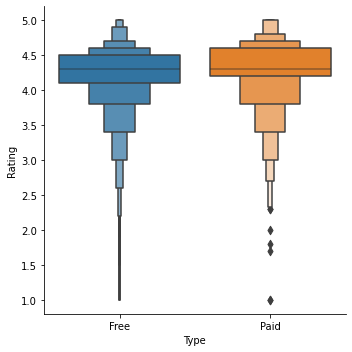

In [172]:
plt.figure(figsize=(15,8))
sns.catplot(y='Rating',x='Type',data = df.sort_values('Rating',ascending=False),kind='boxen')

**INFERENCE**   
Free type apps have good & bad rating both but in Paid apps appoximatly rating is above 2.0.

**Current version vs Android version**

In [173]:
#Current Version Column
categorical['Current Ver'].value_counts()

Varies with device    1467
1.0                    809
1.1                    264
1.2                    178
2.0                    151
                      ... 
8.5                      1
1.0.612931               1
4.7.4.18.0621            1
Version 1.3.1            1
2.26.5.0                 1
Name: Current Ver, Length: 2831, dtype: int64

In [174]:
#Android Version Column
categorical['Android Ver'].value_counts()


4.1 and up            2453
4.0.3 and up          1501
4.0 and up            1376
Varies with device    1362
4.4 and up             980
2.3 and up             652
5.0 and up             601
4.2 and up             394
2.3.3 and up           281
2.2 and up             244
4.3 and up             243
3.0 and up             241
2.1 and up             134
1.6 and up             116
6.0 and up              60
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              24
1.5 and up              20
4.4W and up             12
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
5.0 - 8.0                2
4.0.3 - 7.1.1            2
1.0 and up               2
5.0 - 6.0                1
2.2 - 7.1.1              1
4.1 - 7.1.1              1
7.0 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text major ticklabel objects>)

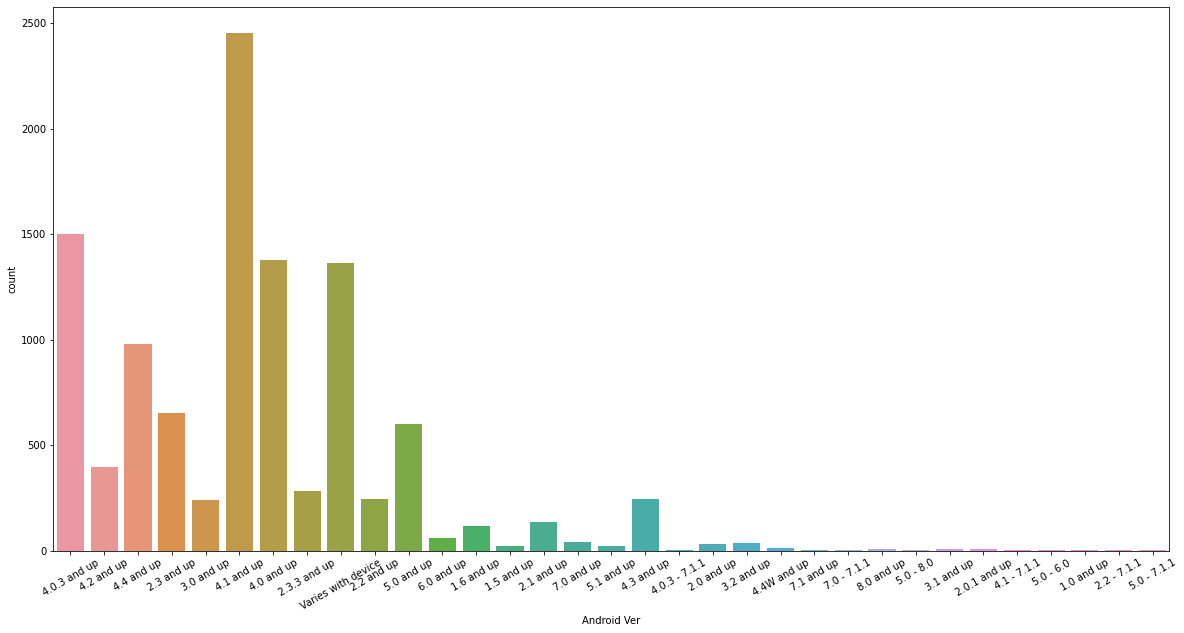

In [175]:
plt.rcParams['figure.figsize'] = (20, 10)
sns.countplot(x='Android Ver',data=df)
plt.xticks(rotation=30)

**INFERENCE**   
Android Version 4.1 and up have more number of count then other Android Version.



#Distribution of apps across various categories

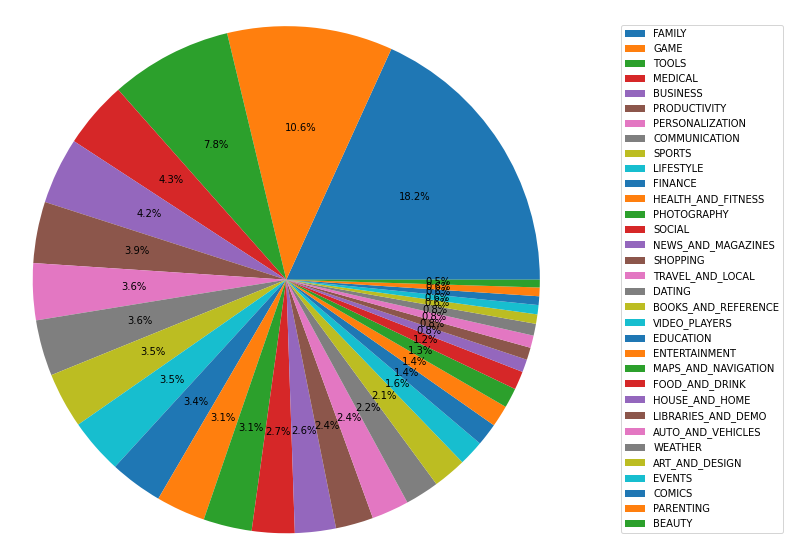

In [177]:
#Basic pie chart to view distribution of apps across various categories
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(aspect="equal"))

number_of_apps = df['Category'].value_counts()

labels = number_of_apps.index
sizes = number_of_apps.values

ax.pie(sizes,labeldistance=2,autopct='%1.1f%%')
ax.legend(labels=labels,loc="right",bbox_to_anchor=(0.9, 0, 0.5, 1))
ax.axis("equal")
plt.show()

**INFERENCE**   
Family and Game apps have the highest market prevelance.

Interestingly, Tools, Business and Medical apps are also catching up



**Conclusions**

1) Adults only 18+ content`s have highest average rating followed by Everyone 10+ content.

2) Facebook have hightest review in Play store followed by Whats App messenger & Instagram.

3) Bowmasters have most translated review in Playstore followed by Angry Birds Classic & Helix Jump.

4)Family kind of apps are most successful in playstore followed by Game & Tools.

5)Most of People`s Sentiment is Positive in Play store.

6) Number of Free apps is more then number of Paid apps.

7) Free type apps have good & bad rating both but in Paid apps appoximatly rating is above 2.0.            
8) Android Version 4.1 and up have more number of count then other Android Version.
9)Family and Game apps have the highest market prevelance.
Interestingly, Tools, Business and Medical apps are also catching up